# 🚀 Automating Cryptocurrency API Extraction

This notebook automates the process of extracting cryptocurrency market data using the CoinMarketCap API. It uses Python libraries such as `requests` and `pandas` to continuously fetch live market data and store it in a structured format.

---

## 🧰 Environment & Tools

- **Python Libraries Used**:
  - `requests` – to make API requests
  - `pandas` – to store and manipulate data
  - `time` and `os` – for controlling request intervals and environment variables

---

## 📡 API Overview

The project uses the **CoinMarketCap Pro API** to extract data on listed cryptocurrencies. The endpoint used is:
```
https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest
```

You will need an **API key** from CoinMarketCap (https://coinmarketcap.com/api/).

---

## ⚙️ Project Workflow

### 1. Import Required Libraries

Libraries for sending HTTP requests and handling data are imported.

### 2. Define API Runner Function

The function `api_runner()` is responsible for:
- Sending requests to the API
- Handling possible errors (connection, timeouts, redirects)
- Storing results in a global DataFrame

### 3. Loop to Automate API Calls

A loop runs the API fetch function multiple times (333 in this case which is also the limit of request in 24hr) with optional `sleep` intervals between each call to avoid API rate limits.

### 4. Optional: Save/Load CSV

Commented-out lines for saving or loading data from a CSV file are included.

---

## 💾 Output

The result is stored in a DataFrame `df`, which can be exported to CSV or processed for visualization or analysis.

---

## ▶️ How to Run

1. Install requirements:
```bash
pip install requests pandas
```

2. Add your API key to the code (`X-CMC_PRO_API_KEY` header).

3. Run all cells in the notebook.

---

## 👨‍💻 Author

**Ujjwal Karki**  
Automating crypto insights for fun and learning 🚀

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [2]:
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7f222d29-d6b7-4a3e-882d-e93a59bd7d83',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if have to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index = True)

    # To create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [3]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [4]:
# df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
# df72

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12199,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987139e+07,1.987139e+07,...,62.6526,2.261124e+12,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
1,1027,Ethereum,ETH,ethereum,10316,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207248e+08,1.207248e+08,...,9.6574,3.300194e+11,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
2,825,Tether USDt,USDT,tether,130074,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.529134e+11,1.560043e+11,...,4.4783,1.560273e+11,None,2025-05-29T05:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-29 11:08:38.152571
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.868601e+10,9.998611e+10,...,3.9259,2.286058e+11,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
4,1839,BNB,BNB,bnb,2553,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408879e+08,1.408879e+08,...,2.8144,9.610484e+10,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
5,5426,Solana,SOL,solana,927,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.205235e+08,6.018272e+08,...,2.6236,1.036409e+11,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
6,3408,USDC,USDC,usd-coin,28310,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.124700e+10,6.124700e+10,...,1.7932,6.123275e+10,None,2025-05-29T05:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-29 11:08:38.152571
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.494597e+11,1.494597e+11,...,0.9846,3.362347e+10,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533451e+10,4.499450e+10,...,0.7773,3.382121e+10,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
9,1958,TRON,TRX,tron,1181,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.487114e+10,9.487114e+10,...,0.7624,2.604929e+10,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571


In [6]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12199,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19871393.00000,19871393.00000,...,62.65260,2261124452233.25000,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
1,1027,Ethereum,ETH,ethereum,10316,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120724829.45032,120724829.45032,...,9.65740,330019445130.56000,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
2,825,Tether USDt,USDT,tether,130074,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,152913418919.93286,156004270711.01822,...,4.47830,156027264688.31000,None,2025-05-29T05:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-29 11:08:38.152571
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58686007292.00000,99986107098.00000,...,3.92590,228605847758.57999,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
4,1839,BNB,BNB,bnb,2553,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140887852.40000,140887852.40000,...,2.81440,96104844300.05000,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
5,5426,Solana,SOL,solana,927,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,520523481.56707,601827195.64649,...,2.62360,103640862142.22000,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
6,3408,USDC,USDC,usd-coin,28310,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61246995835.37331,61246995835.37331,...,1.79320,61232749687.99000,None,2025-05-29T05:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-29 11:08:38.152571
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149459676383.70517,149459676383.70517,...,0.98460,33623474167.76000,None,2025-05-29T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35334514487.46726,44994495302.31451,...,0.77730,33821209399.44000,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571
9,1958,TRON,TRX,tron,1181,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94871138237.72012,94871139472.68234,...,0.76240,26049289680.76000,None,2025-05-29T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-29 11:08:38.152571


In [8]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16932,-1.19481,-3.32980,14.09405,29.45774,34.68883
Ethereum,-0.73754,3.51299,3.59972,52.46215,48.26578,28.42315
Tether USDt,-0.00289,-0.01589,0.01211,-0.03366,0.05192,0.11288
XRP,-0.05692,-0.85298,-5.23935,0.44190,4.54149,12.78067
BNB,-0.29576,-0.12786,-0.09636,12.41620,11.64663,19.37530
Solana,-0.45713,-1.54068,-2.78886,17.64734,36.29011,34.80230
USDC,-0.00091,-0.00055,-0.00282,-0.01993,-0.02154,-0.05216
Dogecoin,-0.39959,0.34561,-6.51191,26.23215,30.87729,20.22856
Cardano,-0.60448,-0.14521,-5.02654,7.37461,10.10237,26.01774


In [9]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.16932
         quote.USD.percent_change_24h   -1.19481
         quote.USD.percent_change_7d    -3.32980
         quote.USD.percent_change_30d   14.09405
         quote.USD.percent_change_60d   29.45774
                                          ...   
Stellar  quote.USD.percent_change_24h   -0.94057
         quote.USD.percent_change_7d    -4.54765
         quote.USD.percent_change_30d    1.66437
         quote.USD.percent_change_60d    5.31075
         quote.USD.percent_change_90d    8.47238
Length: 90, dtype: float64

In [10]:
type(df4)

pandas.core.series.Series

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.16932
        quote.USD.percent_change_24h -1.19481
        quote.USD.percent_change_7d  -3.32980
        quote.USD.percent_change_30d 14.09405
        quote.USD.percent_change_60d 29.45774
...                                       ...
Stellar quote.USD.percent_change_24h -0.94057
        quote.USD.percent_change_7d  -4.54765
        quote.USD.percent_change_30d  1.66437
        quote.USD.percent_change_60d  5.31075
        quote.USD.percent_change_90d  8.47238

[90 rows x 1 columns]

In [12]:
df5.count()

values    90
dtype: int64

In [13]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16932
1,Bitcoin,quote.USD.percent_change_24h,-1.19481
2,Bitcoin,quote.USD.percent_change_7d,-3.32980
3,Bitcoin,quote.USD.percent_change_30d,14.09405
4,Bitcoin,quote.USD.percent_change_60d,29.45774
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.94057
86,Stellar,quote.USD.percent_change_7d,-4.54765
87,Stellar,quote.USD.percent_change_30d,1.66437
88,Stellar,quote.USD.percent_change_60d,5.31075


In [14]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16932
1,Bitcoin,quote.USD.percent_change_24h,-1.19481
2,Bitcoin,quote.USD.percent_change_7d,-3.32980
3,Bitcoin,quote.USD.percent_change_30d,14.09405
4,Bitcoin,quote.USD.percent_change_60d,29.45774
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.94057
86,Stellar,quote.USD.percent_change_7d,-4.54765
87,Stellar,quote.USD.percent_change_30d,1.66437
88,Stellar,quote.USD.percent_change_60d,5.31075


In [15]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.16932
1,Bitcoin,24h,-1.19481
2,Bitcoin,7d,-3.32980
3,Bitcoin,30d,14.09405
4,Bitcoin,60d,29.45774
...,...,...,...
85,Stellar,24h,-0.94057
86,Stellar,7d,-4.54765
87,Stellar,30d,1.66437
88,Stellar,60d,5.31075


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/root123/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


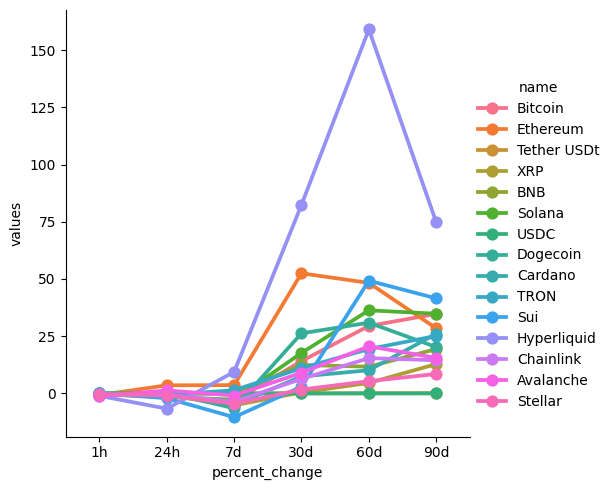

In [17]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [18]:
# Now to do something much simpler
# To create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,107672.59296,2025-05-29 11:08:38.152571
15,Bitcoin,107673.47779,2025-05-29 11:09:44.489115


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

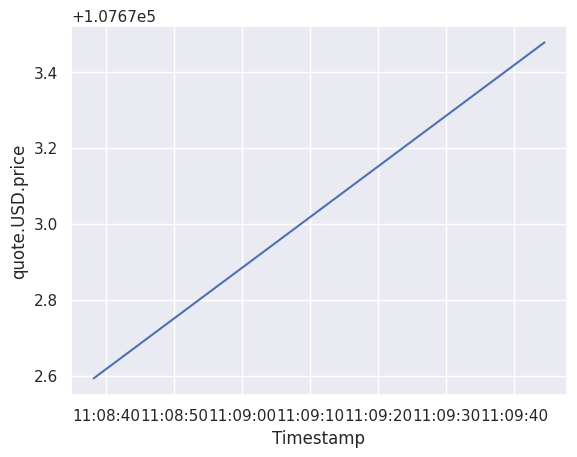

In [19]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)